In [17]:
import pandas as pd

In [18]:
#Load the dataset
df_call=pd.read_csv('/content/callsf0d4f5a.csv')
df_customer=pd.read_csv('/content/customers2afd6ea.csv')
df_reason=pd.read_csv('/content/final_reason_bass.csv')#this is a cleaned dataset
df_senti=pd.read_csv('/content/sentiment_statisticscc1e57a.csv')
df_call.dtypes
df_call.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [19]:
#changing the dtype to datetime
df_call['call_start_datetime'] = pd.to_datetime(df_call['call_start_datetime'])
df_call['call_end_datetime'] = pd.to_datetime(df_call['call_end_datetime'])
df_call['agent_assigned_datetime'] = pd.to_datetime(df_call['agent_assigned_datetime'])
#creating Ht and SA column
df_call['HT_minutes'] = (df_call['call_end_datetime'] - df_call['agent_assigned_datetime']).dt.total_seconds() / 60
df_call['SA_minutes'] = (df_call['agent_assigned_datetime'] - df_call['call_start_datetime']).dt.total_seconds() / 60
df_call.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,HT_minutes,SA_minutes
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0


In [20]:
merged_senti=pd.merge(df_call,df_senti,on='call_id',how='inner')
sentiment_analysis = merged_senti.groupby(['agent_tone', 'customer_tone']).agg(
    avg_AHT=('HT_minutes', 'mean'),
    avg_silence=('silence_percent_average', 'mean'),
    call_count=('call_id', 'count')
).reset_index().sort_values(by='avg_silence')
sentiment_analysis

,agent_tone,customer_tone,avg_AHT,avg_silence,call_count
3,angry,neutral,5.787500,0.172000,80
4,angry,polite,6.358974,0.177436,78
22,polite,frustrated,3.375000,0.178125,16
1,angry,calm,5.882353,0.179265,68
2,angry,frustrated,6.500000,0.186512,86
21,polite,calm,2.294118,0.200588,17
0,angry,angry,8.298701,0.235195,77
12,frustrated,frustrated,9.640789,0.236803,760
14,frustrated,polite,10.243101,0.252168,761
11,frustrated,calm,10.133527,0.253890,689


Heatmap of AHT with tonality

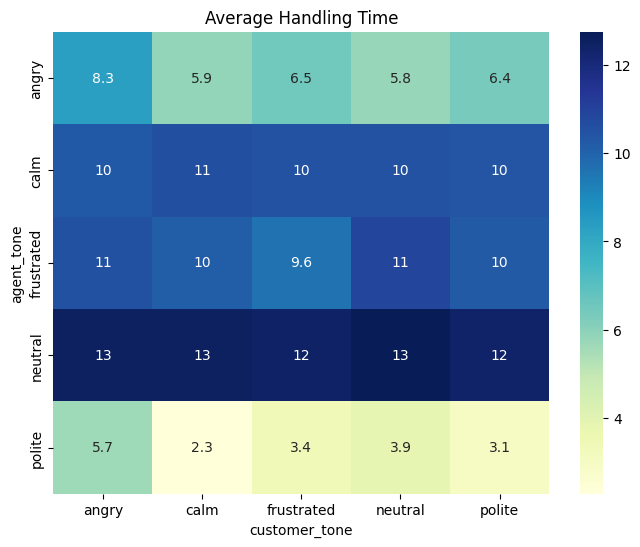

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
pivot_table = sentiment_analysis.pivot(index='agent_tone', columns='customer_tone', values='avg_AHT')

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Average Handling Time')
plt.show()


Heatmap of Silence Percentage with tonality


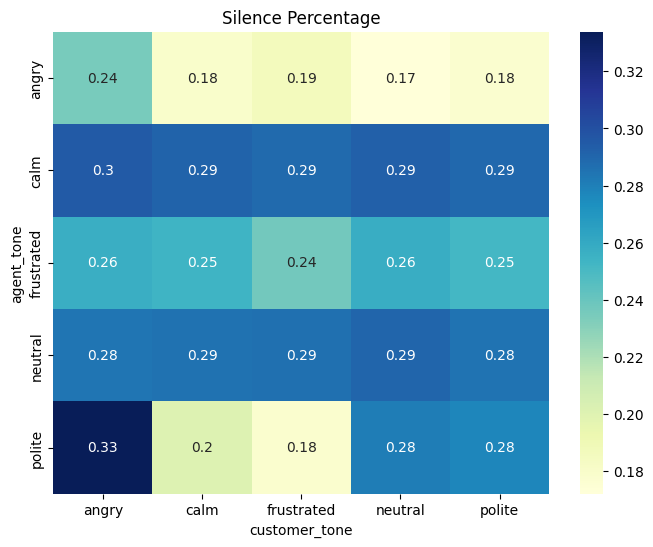

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
pivot_table = sentiment_analysis.pivot(index='agent_tone', columns='customer_tone', values='avg_silence')

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Silence Percentage')
plt.show()

Wordcloud to find trend of words in transcripts

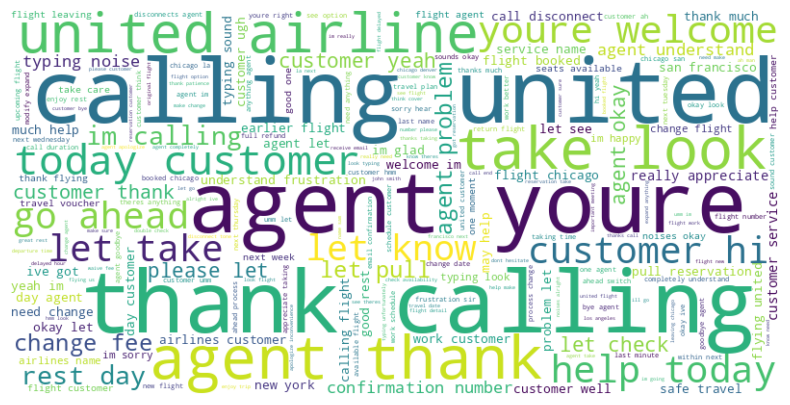

In [23]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#merging the call with reasons df
calls_with_reasons_df = pd.merge(df_call, df_reason, on='call_id',how='inner')

# Step 1: Data Cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

calls_with_reasons_df['cleaned_transcript'] = calls_with_reasons_df['call_transcript'].apply(clean_text)

# Step 2: Tokenization and Stop Words Removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

calls_with_reasons_df['processed_transcript'] = calls_with_reasons_df['cleaned_transcript'].apply(remove_stopwords)

# Step 3: Create Word Cloud
text = ' '.join(calls_with_reasons_df['processed_transcript'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


Most frequent Call Reasons Count

In [24]:
reason_analysis = df_reason.groupby('primary_call_reason').agg(total_calls=('call_id', 'count')).reset_index()

# Sort by the most frequent reasons
reason_analysis = reason_analysis.sort_values('total_calls', ascending=False)
reason_analysis

,primary_call_reason,total_calls
7,irrops,13311
18,voluntary change,10847
13,seating,6365
8,mileage plus,5851
10,post-flight,4331
4,communications,3840
11,products&services,3332
0,baggage,2832
16,upgrade,2738
1,booking,2637


In [ ]:
merged_df = pd.merge(df_call, df_reason, on='call_id', how='left')
df_agent_reason=merged_df.groupby(['agent_id','primary_call_reason']).mean(['HT_minutes','SA_minutes']).reset_index().sort_values(by='agent_id')
df_reason = df_reason.groupby(['primary_call_reason']).size().reset_index(name='count')
df_agent_reason_avg=df_agent_reason.groupby(['primary_call_reason']).mean(['HT_minutes','SA_minutes']).reset_index()
merged_reason=pd.merge(df_reason,df_agent_reason_avg,on='primary_call_reason',how='inner')
merged_reason.sort_values(by='count',ascending=False)
merged_reason=merged_reason.drop(columns=['agent_id','call_id','customer_id'])

In [30]:
merged_reason=merged_reason.sort_values(by='count',ascending=False)
merged_reason

,primary_call_reason,count,HT_minutes,SA_minutes
7,irrops,13311,13.403348,6.018177
18,voluntary change,10847,10.925623,8.953386
13,seating,6365,7.898882,9.502897
8,mileage plus,5851,17.392445,6.020302
10,post-flight,4331,16.441629,9.503959
4,communications,3840,13.992843,4.007160
11,products&services,3332,12.782643,5.054314
0,baggage,2832,5.665395,9.017722
16,upgrade,2738,10.775780,4.959251
1,booking,2637,7.607030,4.013717


**Percentage difference of AHT of most and Least frequent Call**

In [26]:
### calculating percentage difference between maximum and minimum values
# Get the row with the minimum 'count'
min_count_row = merged_reason.loc[merged_reason['count'].idxmin()]

# Get the row with the maximum 'count'
max_count_row = merged_reason.loc[merged_reason['count'].idxmax()]

# Access 'HT_minutes' for the minimum and maximum 'count'
min_count_HT_minutes = min_count_row['HT_minutes']
max_count_HT_minutes = max_count_row['HT_minutes']


##percentage diff betwen handling time of most and least frequent reason
percentage_diff=(max_count_HT_minutes-min_count_HT_minutes)/min_count_HT_minutes*100
percentage_diff


50.4207801355717

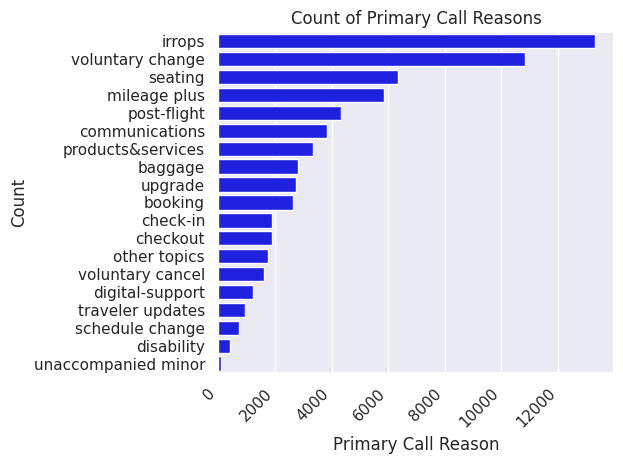

In [31]:
sns.set(style='darkgrid')

# Plot 'count'

sns.barplot(y='primary_call_reason', x='count', data=merged_reason, color='blue')

# Add labels and title
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.title('Count of Primary Call Reasons')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



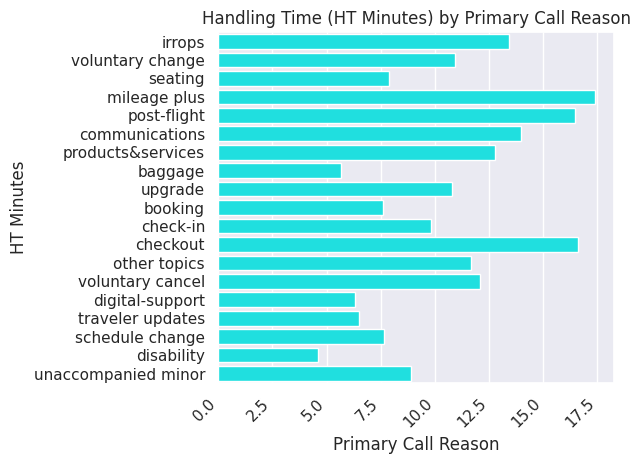

In [32]:
# Plot 'HT_minutes'

sns.barplot(y='primary_call_reason', x='HT_minutes', data=merged_reason, color='cyan')

# Add labels and title
plt.xlabel('Primary Call Reason')
plt.ylabel('HT Minutes')
plt.title('Handling Time (HT Minutes) by Primary Call Reason')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


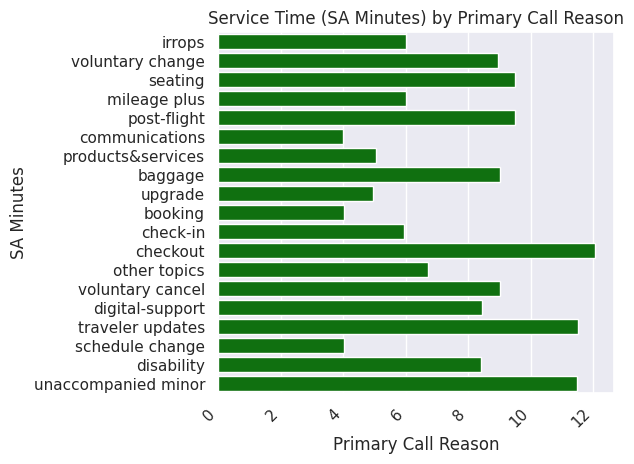

In [33]:
# Plot 'SA_minutes'

sns.barplot(y='primary_call_reason', x='SA_minutes', data=merged_reason, color='green')

# Add labels and title
plt.xlabel('Primary Call Reason')
plt.ylabel('SA Minutes')
plt.title('Service Time (SA Minutes) by Primary Call Reason')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
#bekar


In [35]:
merged_senti=pd.merge(df_call,df_senti,on='call_id',how='inner')
sentiment_analysis = merged_senti.groupby(['agent_tone', 'customer_tone']).agg(
    avg_AHT=('HT_minutes', 'mean'),
    avg_silence=('silence_percent_average', 'mean'),
    call_count=('call_id', 'count')
).reset_index().sort_values(by='avg_silence')
sentiment_analysis

,agent_tone,customer_tone,avg_AHT,avg_silence,call_count
3,angry,neutral,5.787500,0.172000,80
4,angry,polite,6.358974,0.177436,78
22,polite,frustrated,3.375000,0.178125,16
1,angry,calm,5.882353,0.179265,68
2,angry,frustrated,6.500000,0.186512,86
21,polite,calm,2.294118,0.200588,17
0,angry,angry,8.298701,0.235195,77
12,frustrated,frustrated,9.640789,0.236803,760
14,frustrated,polite,10.243101,0.252168,761
11,frustrated,calm,10.133527,0.253890,689


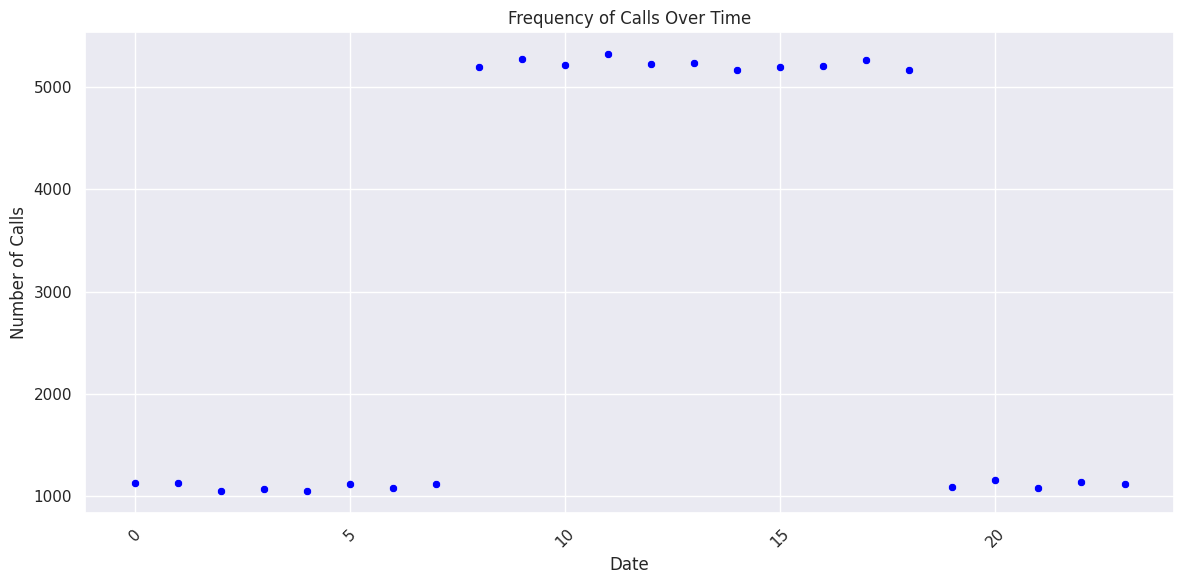

In [36]:

# Extract just the date or time part depending on how granular you want the analysis
df_call['date'] = df_call['agent_assigned_datetime'].dt.hour  # Use .dt.hour if you want hourly analysis

# Count the number of calls per day
call_counts = df_call.groupby('date').size().reset_index(name='call_count')

# Create the scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='call_count', data=call_counts, color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Frequency of Calls Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



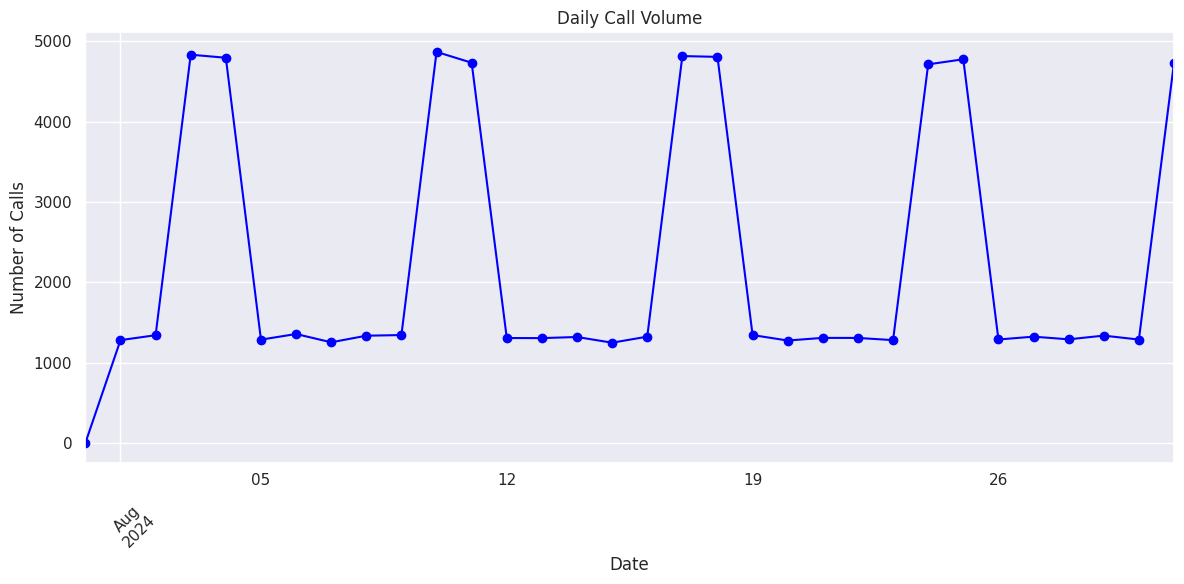

In [37]:
df=df_call.copy()
# Resample data by day and count calls
daily_call_volume = df.resample('D', on='call_start_datetime').size()

# Plot daily call volume
plt.figure(figsize=(12, 6))
daily_call_volume.plot(kind='line', marker='o', color='blue')

plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Daily Call Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


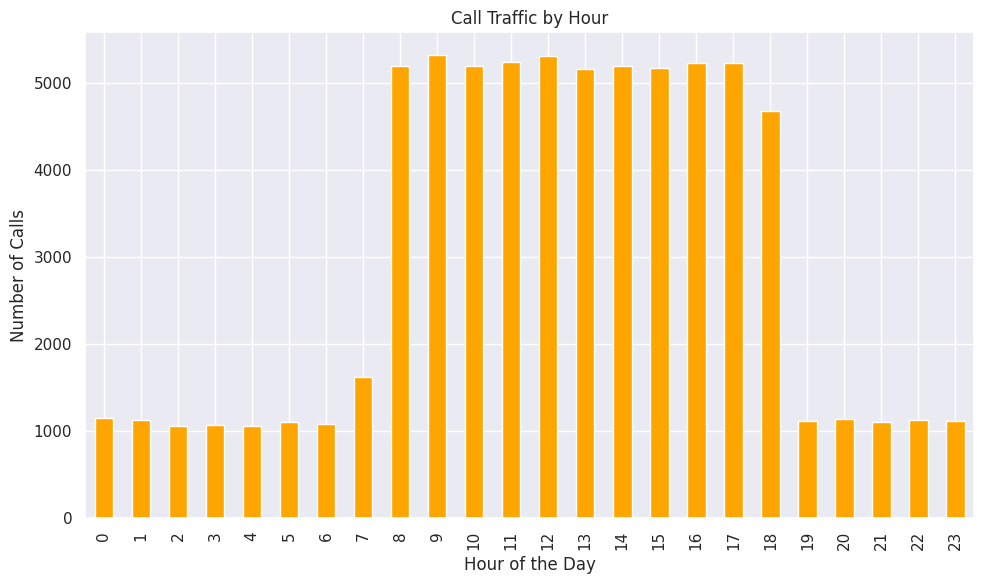

In [38]:
# Extract hour from call start time
df['hour'] = df['call_start_datetime'].dt.hour

# Group by hour and count the number of calls
calls_by_hour = df.groupby('hour').size()

# Plot calls by hour
plt.figure(figsize=(10, 6))
calls_by_hour.plot(kind='bar', color='orange')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.title('Call Traffic by Hour')
plt.grid(True)
plt.tight_layout()
plt.show()


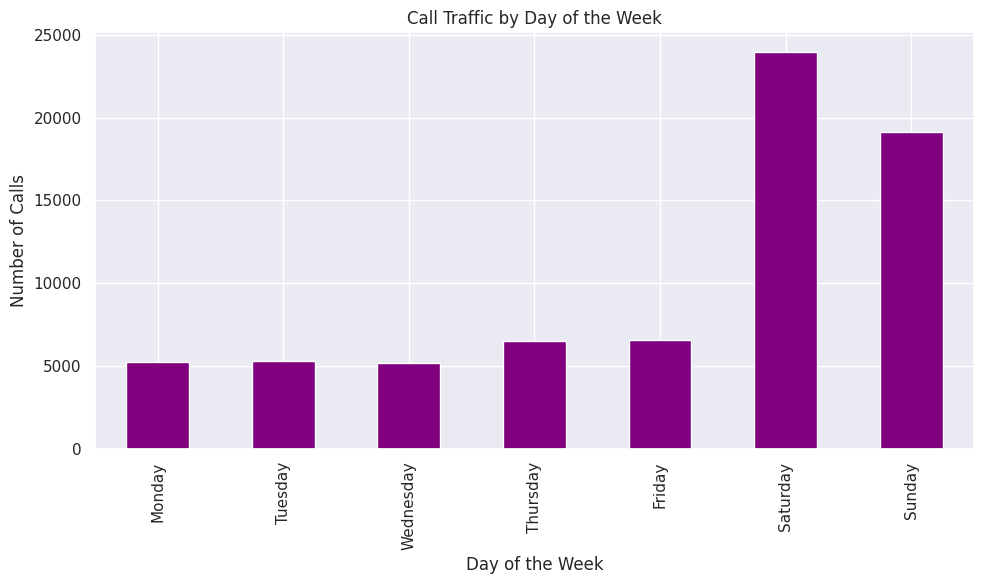

In [39]:
# Extract day of the week from call start time
df['day_of_week'] = df['call_start_datetime'].dt.day_name()

# Group by day of the week and count the number of calls
calls_by_day = df.groupby('day_of_week').size()

# Sort by days of the week for better readability
calls_by_day = calls_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot calls by day of the week
plt.figure(figsize=(10, 6))
calls_by_day.plot(kind='bar', color='purple')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.title('Call Traffic by Day of the Week')
plt.grid(True)
plt.tight_layout()
plt.show()


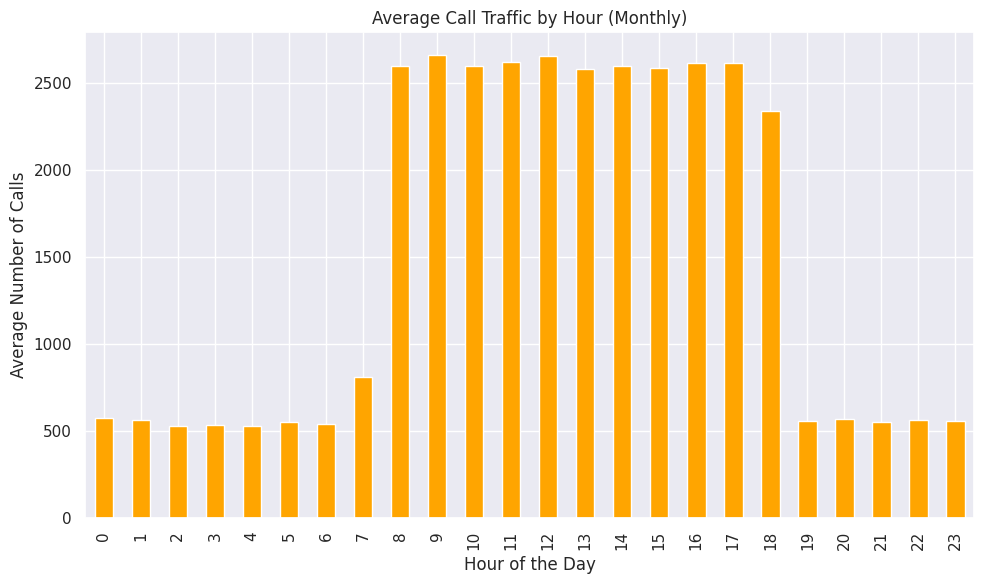

In [40]:
# Extract hour from call start time
df['hour'] = df['call_start_datetime'].dt.hour

# Group by hour and month, then calculate average calls per hour for each month
monthly_calls_by_hour = df.groupby([df['call_start_datetime'].dt.to_period('M'), 'hour']).size().unstack(fill_value=0)
monthly_avg_calls_by_hour = monthly_calls_by_hour.mean(axis=0)

# Plot average calls by hour (across all months)
plt.figure(figsize=(10, 6))
monthly_avg_calls_by_hour.plot(kind='bar', color='orange')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Calls')
plt.title('Average Call Traffic by Hour (Monthly)')
plt.grid(True)
plt.tight_layout()
plt.show()


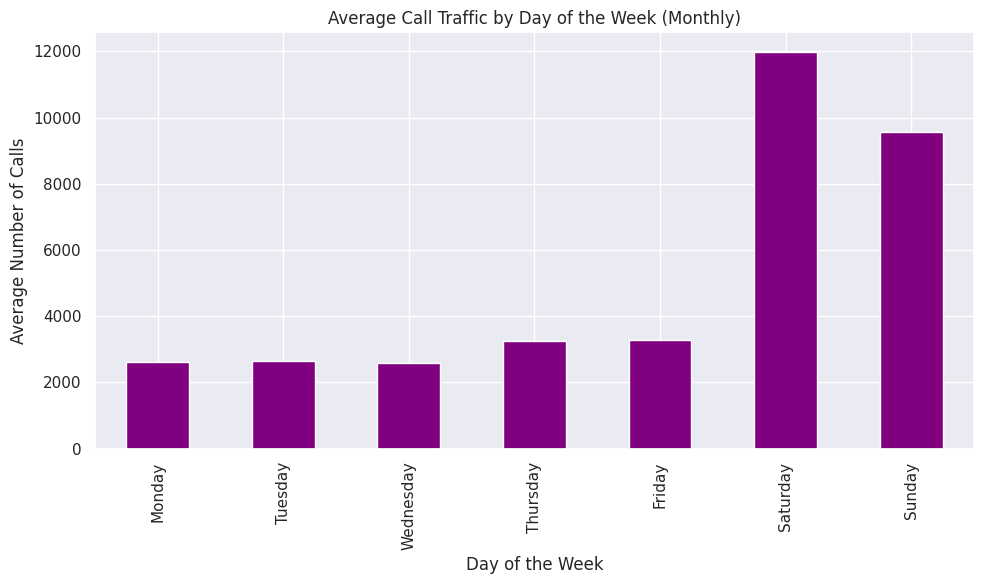

In [41]:
# Extract day of the week from call start time
df['day_of_week'] = df['call_start_datetime'].dt.day_name()

# Group by day of the week and month, then calculate average calls per day of the week for each month
monthly_calls_by_day = df.groupby([df['call_start_datetime'].dt.to_period('M'), 'day_of_week']).size().unstack(fill_value=0)
monthly_avg_calls_by_day = monthly_calls_by_day.mean(axis=0)

# Sort by days of the week for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_avg_calls_by_day = monthly_avg_calls_by_day.reindex(days_order)

# Plot average calls by day of the week (across all months)
plt.figure(figsize=(10, 6))
monthly_avg_calls_by_day.plot(kind='bar', color='purple')

plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Calls')
plt.title('Average Call Traffic by Day of the Week (Monthly)')
plt.grid(True)
plt.tight_layout()
plt.show()


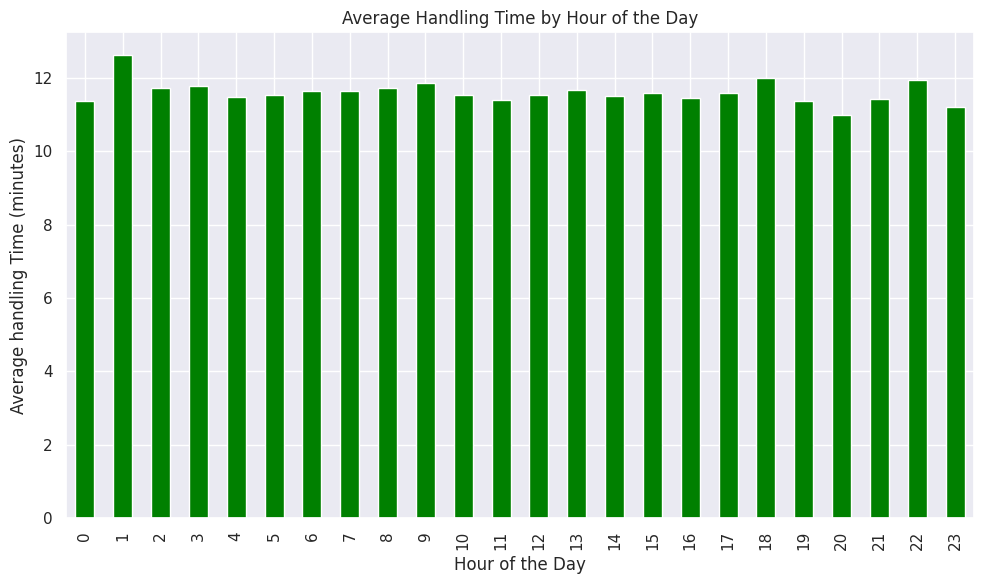

In [42]:
# Extract the hour from call start time
df['hour'] = df['call_start_datetime'].dt.hour

# Group by hour and calculate the average handling time
avg_ht_by_hour = df.groupby('hour')['HT_minutes'].mean()

# Plot average handling time by hour
plt.figure(figsize=(10, 6))
avg_ht_by_hour.plot(kind='bar', color='green')

plt.xlabel('Hour of the Day')
plt.ylabel('Average handling Time (minutes)')
plt.title('Average Handling Time by Hour of the Day')
plt.grid(True)
plt.tight_layout()
plt.show()


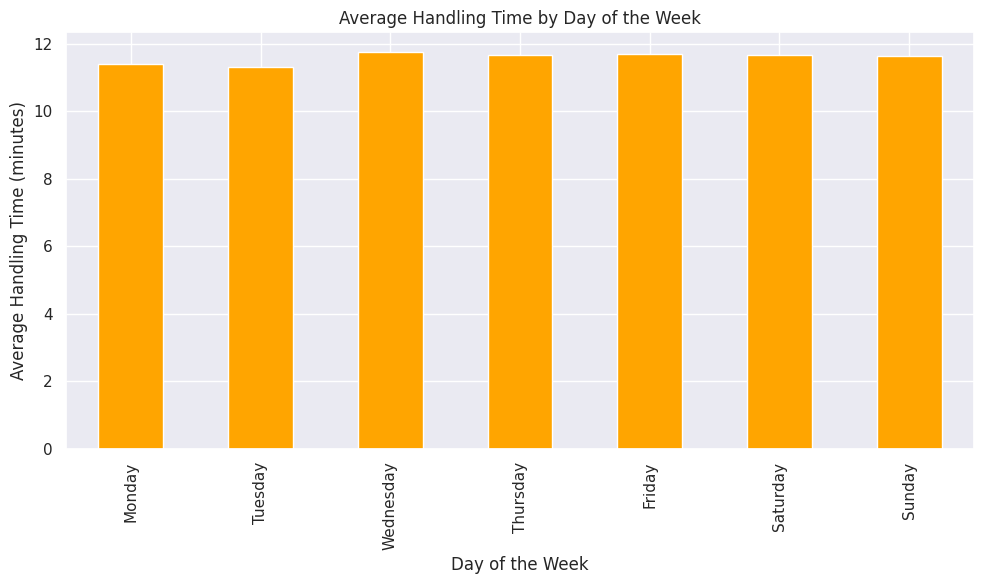

In [43]:
# Extract the day of the week from call start time
df['day_of_week'] = df['call_start_datetime'].dt.day_name()

# Group by day of the week and calculate average handling time
avg_ht_by_day = df.groupby('day_of_week')['HT_minutes'].mean()

# Sort days of the week in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_ht_by_day = avg_ht_by_day.reindex(days_order)

# Plot average handling time by day of the week
plt.figure(figsize=(10, 6))
avg_ht_by_day.plot(kind='bar', color='orange')

plt.xlabel('Day of the Week')
plt.ylabel('Average Handling Time (minutes)')
plt.title('Average Handling Time by Day of the Week')
plt.grid(True)
plt.tight_layout()
plt.show()


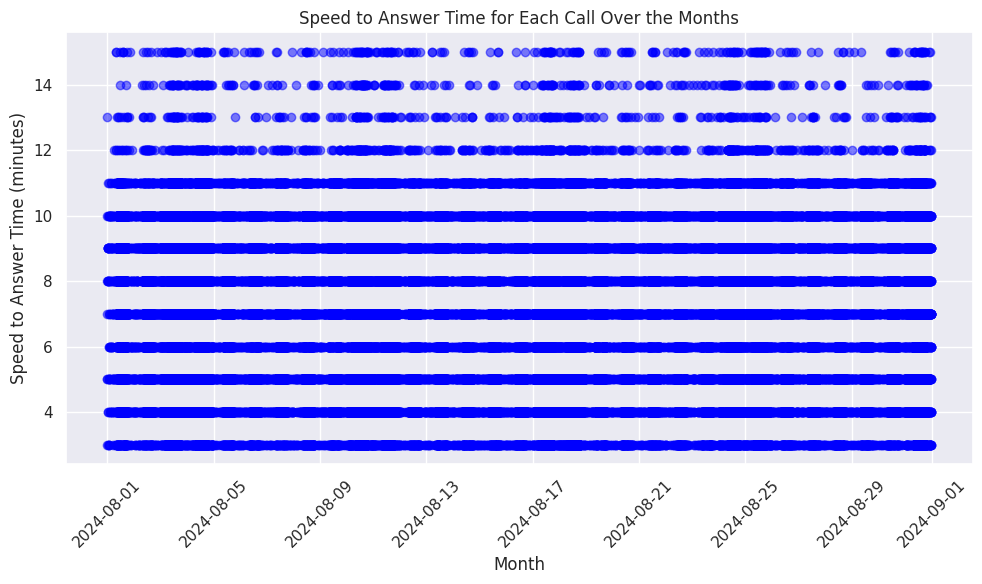

In [44]:
# Resample by month and plot each individual call's SA_minutes
df.set_index('call_start_datetime', inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['SA_minutes'], color='blue', alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Speed to Answer Time (minutes)')
plt.title('Speed to Answer Time for Each Call Over the Months')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


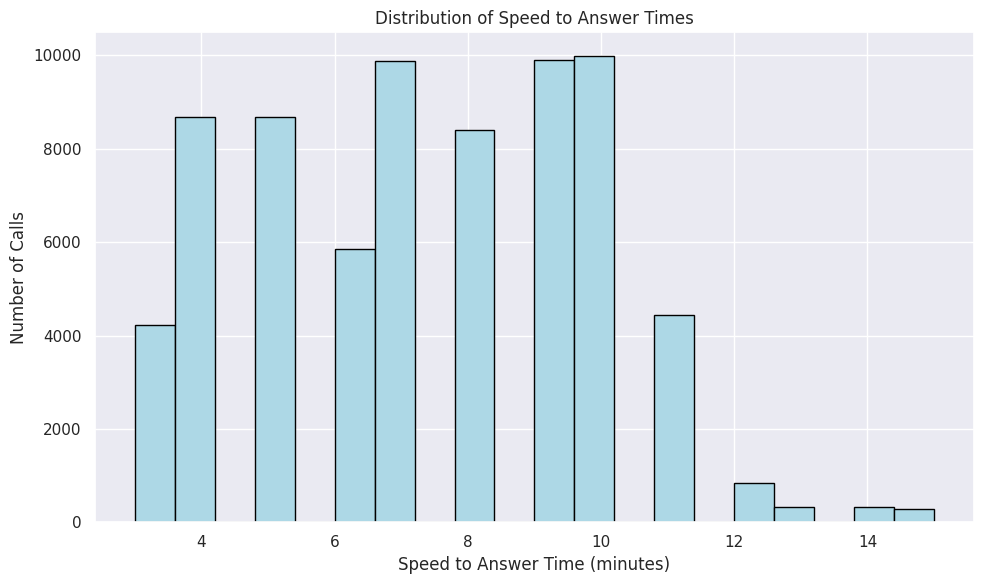

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['SA_minutes'], bins=20, color='lightblue', edgecolor='black')

plt.xlabel('Speed to Answer Time (minutes)')
plt.ylabel('Number of Calls')
plt.title('Distribution of Speed to Answer Times')
plt.grid(True)
plt.tight_layout()
plt.show()


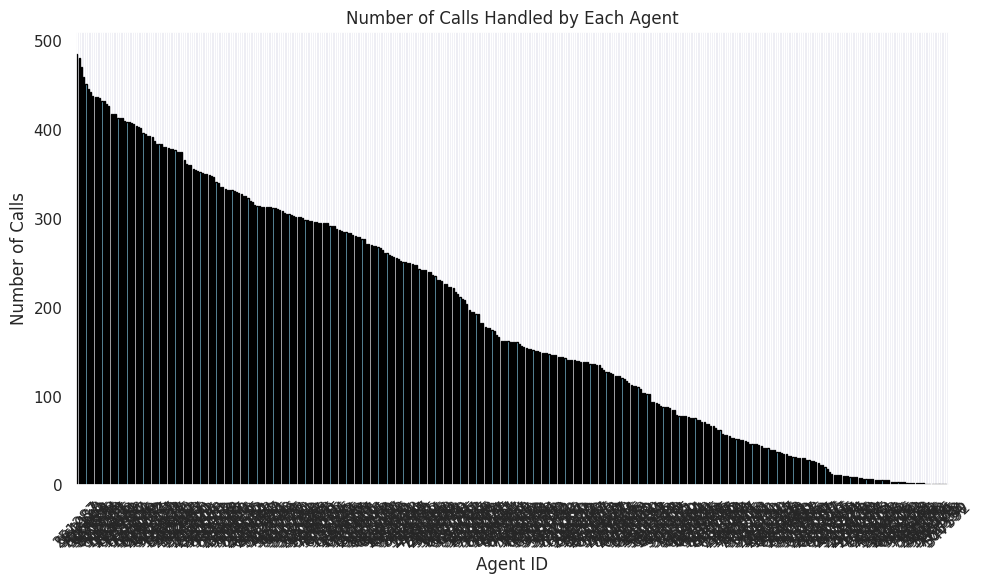

In [48]:
call_counts = df['agent_id'].value_counts()

# Plotting the call counts by agent
plt.figure(figsize=(10, 6))
call_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Calls Handled by Each Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [49]:
df_agent=pd.merge(df_call,df_senti,on='call_id',how='inner')
df_agent

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,HT_minutes,SA_minutes,date,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0,0,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0,0,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0,0,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0,0,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0,0,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,28.0,9.0,23,413148,calm,calm,0.05,0.34
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,8.0,3.0,23,980156,calm,frustrated,0.03,0.22
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,6.0,6.0,23,616988,calm,polite,0.05,0.42
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,4.0,6.0,23,161354,neutral,polite,-0.07,0.13


([<matplotlib.axis.XTick at 0x7e64175d3100>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

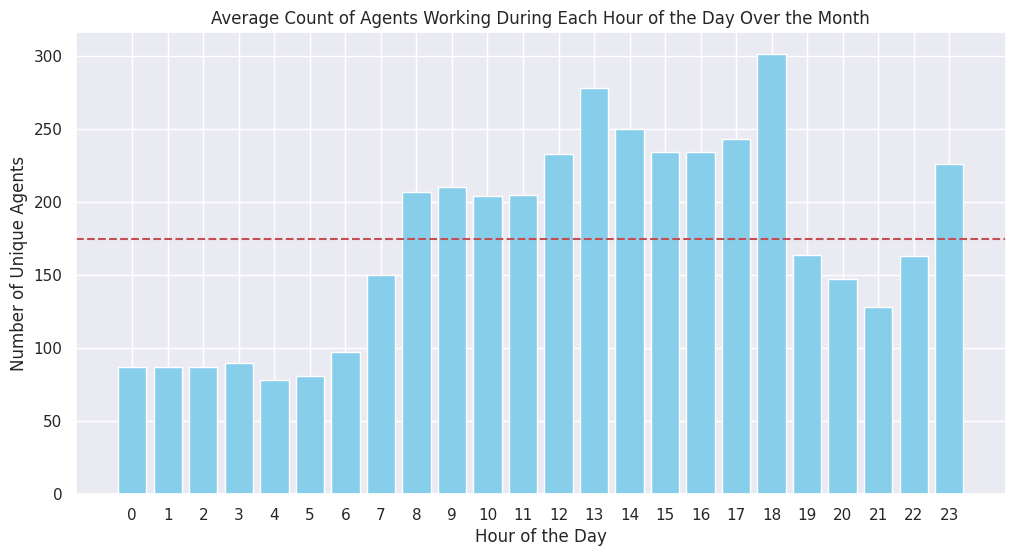

In [51]:

#Extract hour and month from call_start_datetime
df_call['hour_of_day'] = df_call['call_start_datetime'].dt.hour
df_call['month'] = df_call['call_start_datetime'].dt.month

# Group by hour of the day and count unique agents
agent_counts = df_call.groupby(['hour_of_day'])['agent_id'].nunique().reset_index(name='unique_agent_count')

# Calculate the average count of agents for each hour
average_agent_counts = agent_counts['unique_agent_count'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(agent_counts['hour_of_day'], agent_counts['unique_agent_count'], color='skyblue')
plt.axhline(y=average_agent_counts, color='r', linestyle='--', label='Average Agents')
plt.title('Average Count of Agents Working During Each Hour of the Day Over the Month')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Unique Agents')
plt.xticks(range(24))  # Show each hour



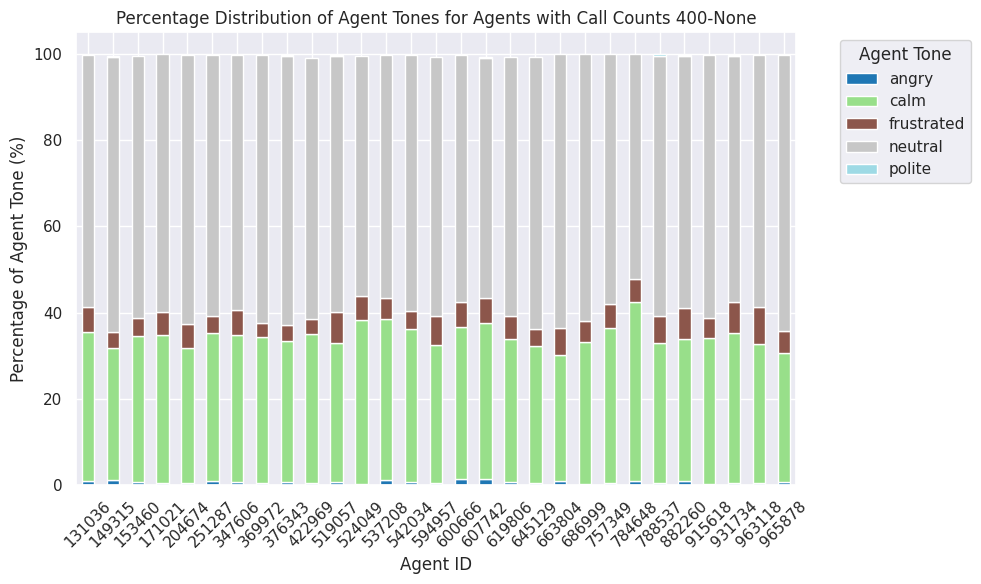

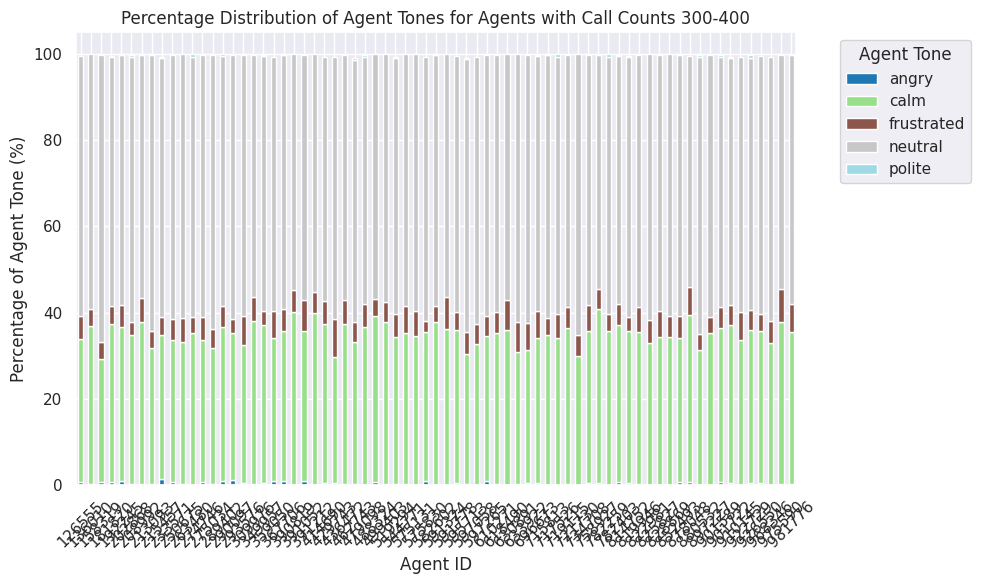

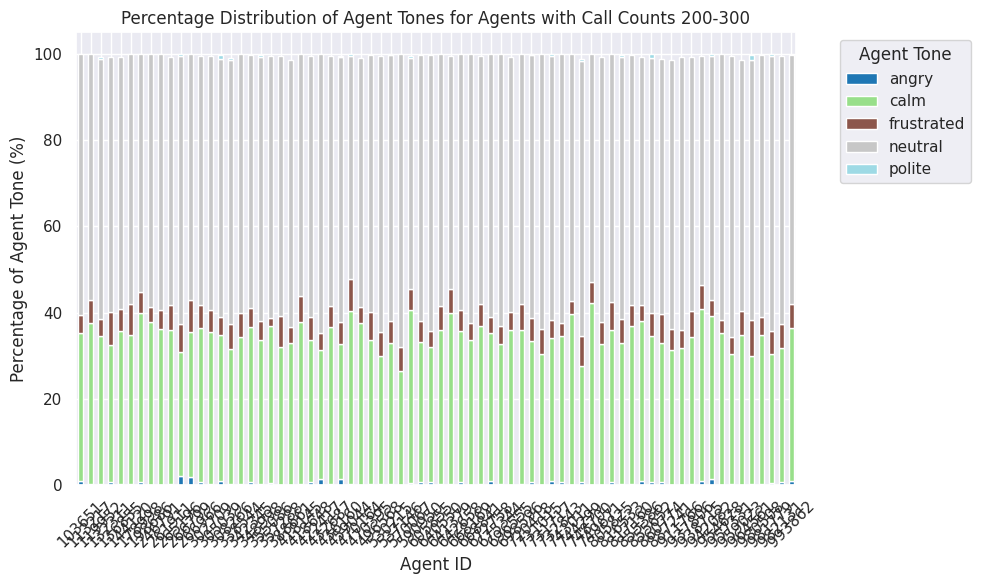

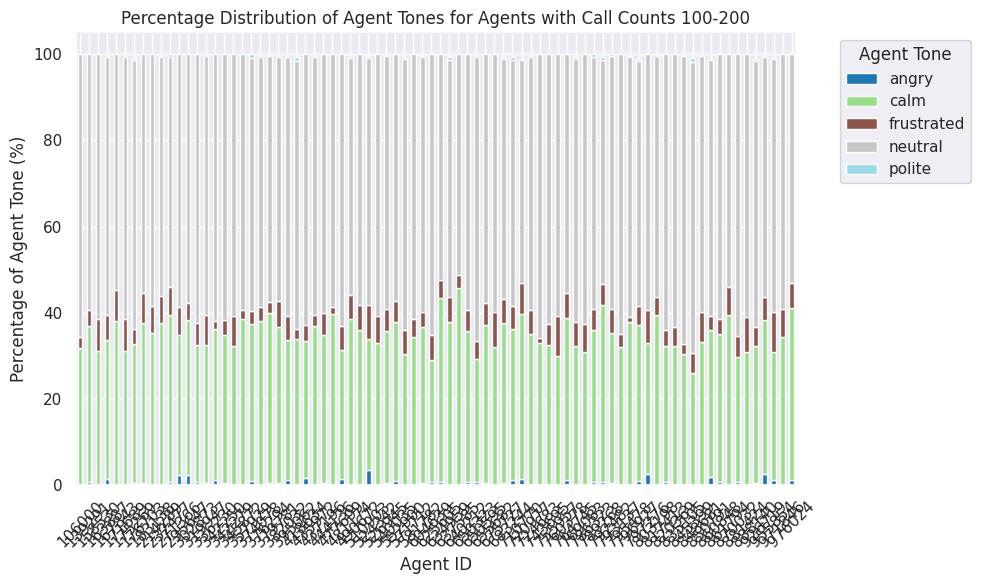

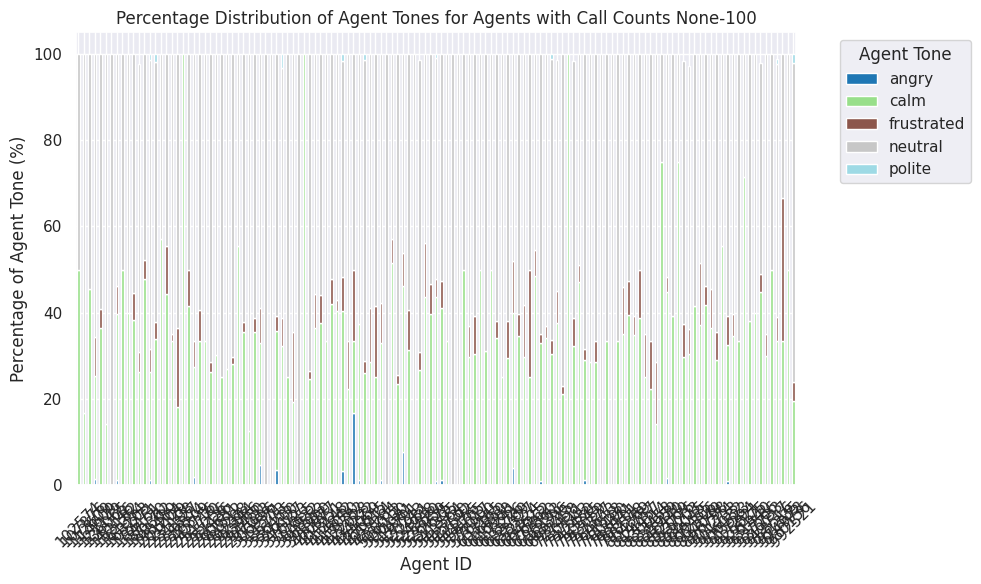

In [53]:


# Calculate the total call count per agent
total_call_count = df_agent.groupby('agent_id_y').size().reset_index(name='total_call_count')

#  Merge the total call count with the main dataframe
df_agent_with_counts = pd.merge(df_agent, total_call_count, on='agent_id_y')

# Function to plot the percentage distribution of tones for a specific range of call counts
def plot_tone_distribution_percentage(min_calls=None, max_calls=None):
    # Filter based on the given range of total call count
    if min_calls and max_calls:
        filtered_agents = df_agent_with_counts[(df_agent_with_counts['total_call_count'] > min_calls) &
                                               (df_agent_with_counts['total_call_count'] <= max_calls)]
    elif min_calls:
        filtered_agents = df_agent_with_counts[df_agent_with_counts['total_call_count'] > min_calls]
    elif max_calls:
        filtered_agents = df_agent_with_counts[df_agent_with_counts['total_call_count'] <= max_calls]
    else:
        filtered_agents = df_agent_with_counts  # All agents

    #  Group by agent_id and agent_tone, and calculate the count
    tone_distribution = filtered_agents.groupby(['agent_id_y', 'agent_tone']).size().reset_index(name='count')

    # Merge with total call counts to calculate the percentage of each tone per agent
    tone_distribution = pd.merge(tone_distribution, total_call_count, on='agent_id_y')
    tone_distribution['percentage'] = (tone_distribution['count'] / tone_distribution['total_call_count']) * 100

    #  Pivot the data for stacked bar plotting (using percentage)
    pivot_tone_distribution = tone_distribution.pivot(index='agent_id_y', columns='agent_tone', values='percentage').fillna(0)

    # Plotting the stacked bar chart (showing percentages)
    pivot_tone_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
    plt.title(f'Percentage Distribution of Agent Tones for Agents with Call Counts {min_calls}-{max_calls}')
    plt.xlabel('Agent ID')
    plt.ylabel('Percentage of Agent Tone (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Agent Tone', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot for different chunks of agents
# Example: Agents with more than 400 calls
plot_tone_distribution_percentage(min_calls=400)

# Example: Agents with call count between 300 and 400
plot_tone_distribution_percentage(min_calls=300, max_calls=400)

# Example: Agents with call count between 200 and 300
plot_tone_distribution_percentage(min_calls=200, max_calls=300)

# Example: Agents with call count between 100 and 200
plot_tone_distribution_percentage(min_calls=100, max_calls=200)

# Example: Agents with call count less than or equal to 100
plot_tone_distribution_percentage(max_calls=100)


In [54]:

# Calculate the total call count per agent
total_call_count = df_agent.groupby('agent_id_y').size().reset_index(name='total_call_count')

#  Merge the total call count with the main dataframe
df_agent_with_counts = pd.merge(df_agent, total_call_count, on='agent_id_y')

#  Define a function to categorize agents into call count groups
def categorize_agent(call_count):
    if call_count > 400:
        return '>400'
    elif 300 < call_count <= 400:
        return '300-400'
    elif 200 < call_count <= 300:
        return '200-300'
    elif 100 < call_count <= 200:
        return '100-200'
    else:
        return '<=100'

#  Apply the categorization function to create a new column
df_agent_with_counts['call_count_group'] = df_agent_with_counts['total_call_count'].apply(categorize_agent)

#  Encode the call count groups into numerical values
# You can assign integers based on the groups
group_encoding = {
    '>400': 5,
    '300-400': 4,
    '200-300': 3,
    '100-200': 2,
    '<=100': 1
}

#  Create a new column for encoded values
df_agent_with_counts['encoded_call_count_group'] = df_agent_with_counts['call_count_group'].map(group_encoding)



<Figure size 1200x600 with 0 Axes>

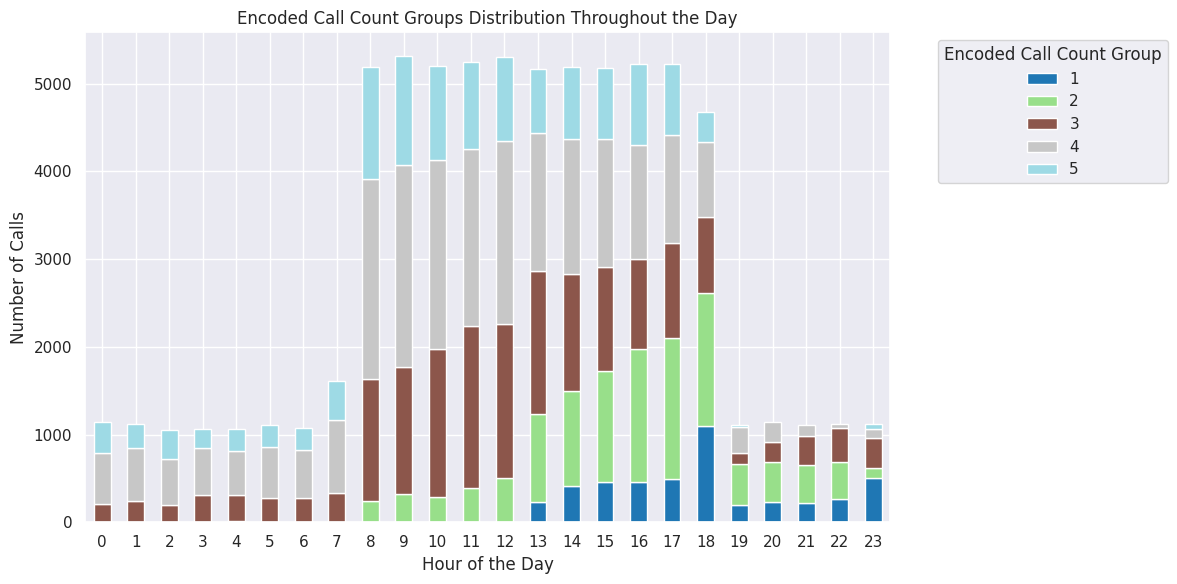

<Figure size 1200x600 with 0 Axes>

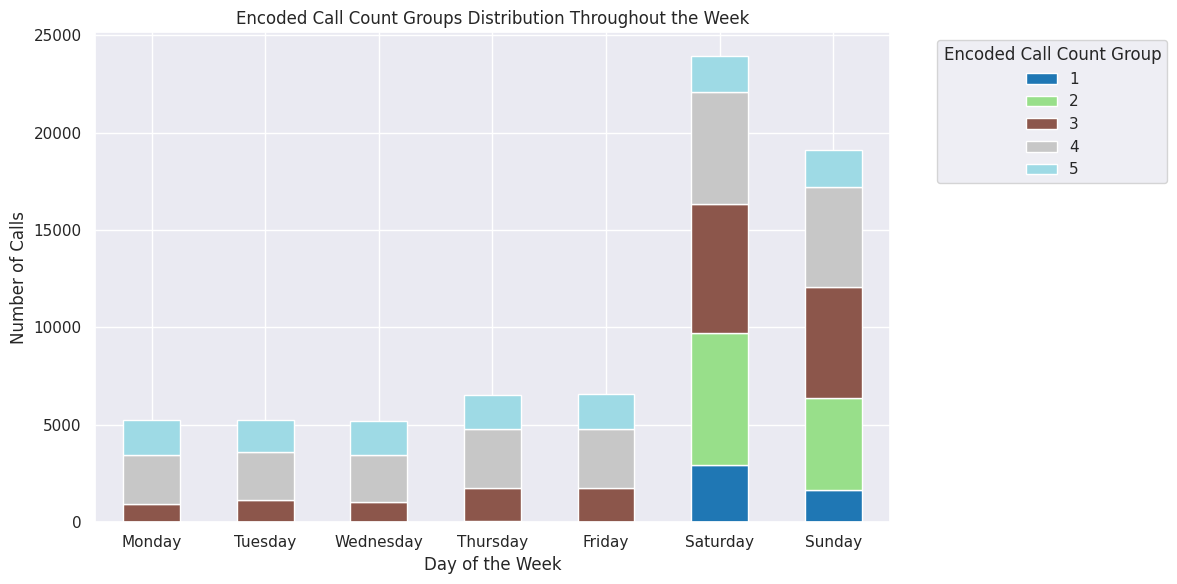

In [55]:

#  Extract hour of the day and day of the week
df_agent_with_counts['hour_of_day'] = df_agent_with_counts['call_start_datetime'].dt.hour
df_agent_with_counts['day_of_week'] = df_agent_with_counts['call_start_datetime'].dt.day_name()  # or dt.dayofweek for numeric representation

#  Group by hour and encoded call count group for daily traffic
daily_traffic = df_agent_with_counts.groupby(['hour_of_day', 'encoded_call_count_group']).size().reset_index(name='count')

#  Pivot the data for daily visualization
pivot_daily_traffic = daily_traffic.pivot(index='hour_of_day', columns='encoded_call_count_group', values='count').fillna(0)

# Plot the distribution for each hour of the day
plt.figure(figsize=(12, 6))
pivot_daily_traffic.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Encoded Call Count Groups Distribution Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.xticks(rotation=0)
plt.legend(title='Encoded Call Count Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#  Group by day of the week and encoded call count group for weekly traffic
weekly_traffic = df_agent_with_counts.groupby(['day_of_week', 'encoded_call_count_group']).size().reset_index(name='count')

#  Ensure the days are in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_traffic['day_of_week'] = pd.Categorical(weekly_traffic['day_of_week'], categories=days_order, ordered=True)

#  Pivot the data for weekly visualization
pivot_weekly_traffic = weekly_traffic.pivot(index='day_of_week', columns='encoded_call_count_group', values='count').fillna(0)

#  Plot the distribution for each day of the week
plt.figure(figsize=(12, 6))
pivot_weekly_traffic.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Encoded Call Count Groups Distribution Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.xticks(rotation=0)
plt.legend(title='Encoded Call Count Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-56-53df0c7ed7f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_5['hour_of_day'] = df_group_5['call_start_datetime'].dt.hour


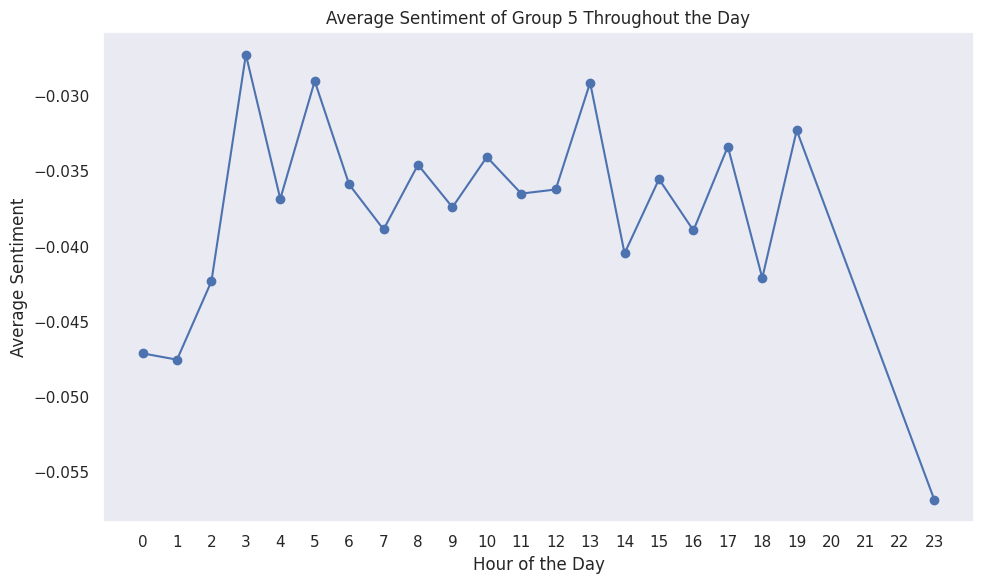

In [56]:

# Filter the DataFrame for the encoded call count group value 5
df_group_5 = df_agent_with_counts[df_agent_with_counts['encoded_call_count_group'] == 5]

#  Extract hour of the day
df_group_5['hour_of_day'] = df_group_5['call_start_datetime'].dt.hour

#  Group by hour and calculate average sentiment
average_sentiment_by_hour = df_group_5.groupby('hour_of_day')['average_sentiment'].mean().reset_index()



#  Plot the average sentiment during different times of the day
plt.figure(figsize=(10, 6))
plt.plot(average_sentiment_by_hour['hour_of_day'], average_sentiment_by_hour['average_sentiment'], marker='o')
plt.title('Average Sentiment of Group 5 Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sentiment')
plt.xticks(range(24))  # Set x-ticks to show each hour
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-57-6b7f7f8e9597>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_5['hour_of_day'] = df_group_5['call_start_datetime'].dt.hour


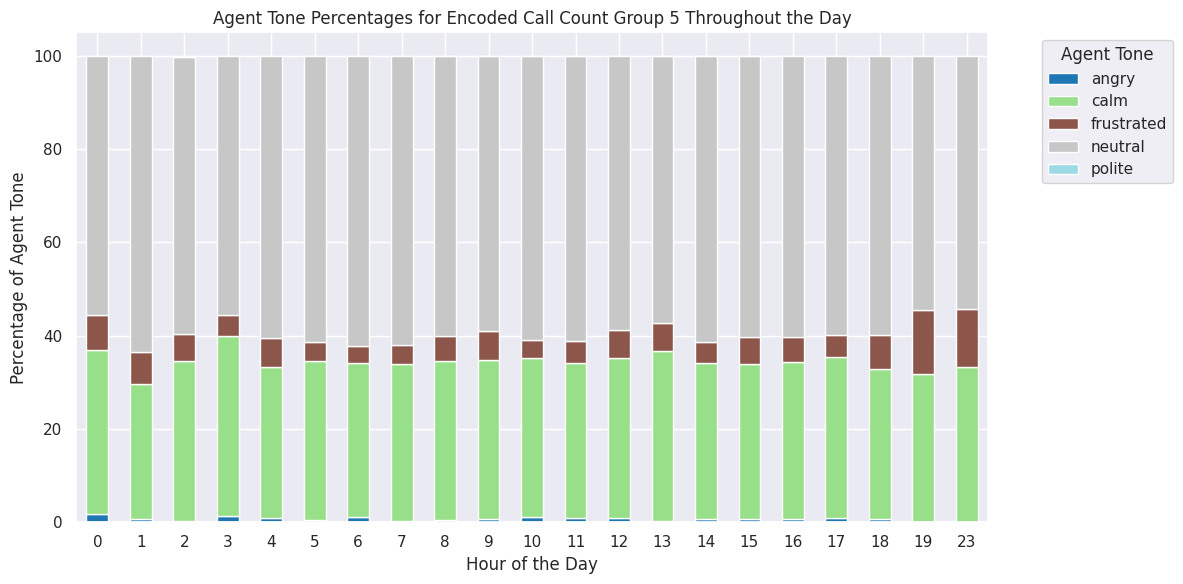

In [57]:


# Filter the DataFrame for the encoded call count group value 5
df_group_5 = df_agent_with_counts[df_agent_with_counts['encoded_call_count_group'] == 5]

#  Extract hour of the day
df_group_5['hour_of_day'] = df_group_5['call_start_datetime'].dt.hour

#  Group by hour and agent tone, and count occurrences
tone_distribution = df_group_5.groupby(['hour_of_day', 'agent_tone']).size().reset_index(name='count')

# Calculate the percentage for each hour
tone_distribution['percentage'] = tone_distribution.groupby('hour_of_day')['count'].transform(lambda x: (x / x.sum()) * 100)

#  Pivot the data for better visualization
pivot_tone = tone_distribution.pivot(index='hour_of_day', columns='agent_tone', values='percentage').fillna(0)



# Plot the tone distribution percentages for each hour of the day
pivot_tone.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Agent Tone Percentages for Encoded Call Count Group 5 Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Agent Tone')
plt.xticks(rotation=0)
plt.legend(title='Agent Tone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


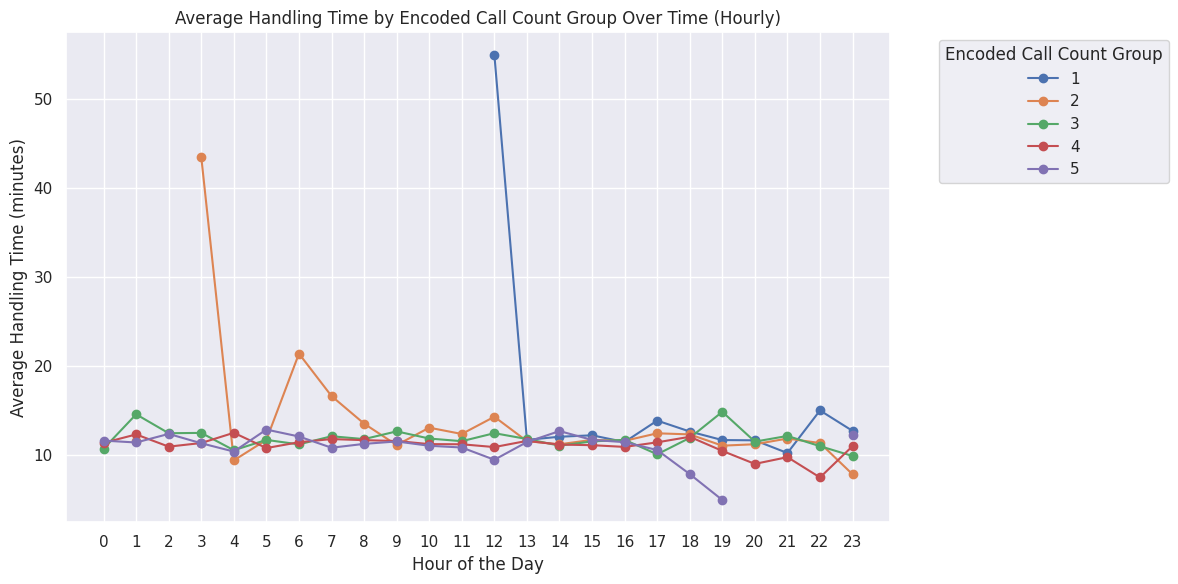

In [58]:

#  Extract hour of the day
df_agent_with_counts['hour_of_day'] = df_agent_with_counts['call_start_datetime'].dt.hour

#  Group by hour and encoded call count group, calculate the average handling time (HT_minutes)
avg_handling_time = df_agent_with_counts.groupby(['hour_of_day', 'encoded_call_count_group'])['HT_minutes'].mean().reset_index()

#  Pivot the data to have hours as rows and call count groups as columns for better visualization
pivot_ht = avg_handling_time.pivot(index='hour_of_day', columns='encoded_call_count_group', values='HT_minutes')



#  Plot the average handling time for each group over time (hour of the day)
pivot_ht.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Average Handling Time by Encoded Call Count Group Over Time (Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handling Time (minutes)')
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour of the day
plt.grid(True)
plt.legend(title='Encoded Call Count Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


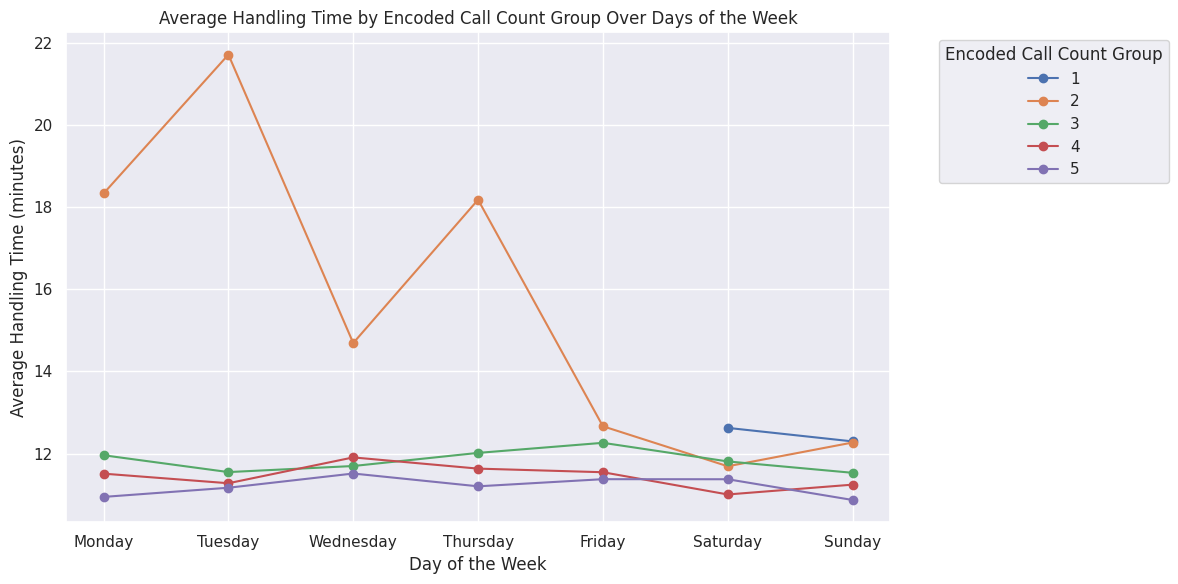

In [59]:

#  Extract the day of the week (Monday=0, Sunday=6)
df_agent_with_counts['day_of_week'] = df_agent_with_counts['call_start_datetime'].dt.dayofweek

#  Group by day of the week and encoded call count group, calculate the average handling time (HT_minutes)
avg_handling_time_week = df_agent_with_counts.groupby(['day_of_week', 'encoded_call_count_group'])['HT_minutes'].mean().reset_index()

# Pivot the data to have days of the week as rows and call count groups as columns for better visualization
pivot_ht_week = avg_handling_time_week.pivot(index='day_of_week', columns='encoded_call_count_group', values='HT_minutes')



# Step 5: Create a custom day labels map for better visualization (e.g., 0=Monday, 6=Sunday)
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#  Plot the average handling time for each group over the days of the week
pivot_ht_week.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Average Handling Time by Encoded Call Count Group Over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Handling Time (minutes)')
plt.xticks(ticks=range(7), labels=day_labels)  # Set x-axis labels for days of the week
plt.grid(True)
plt.legend(title='Encoded Call Count Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



<ipython-input-61-1b434b0c46cf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='elite_level_code', y='HT_minutes', data=df_grouped, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

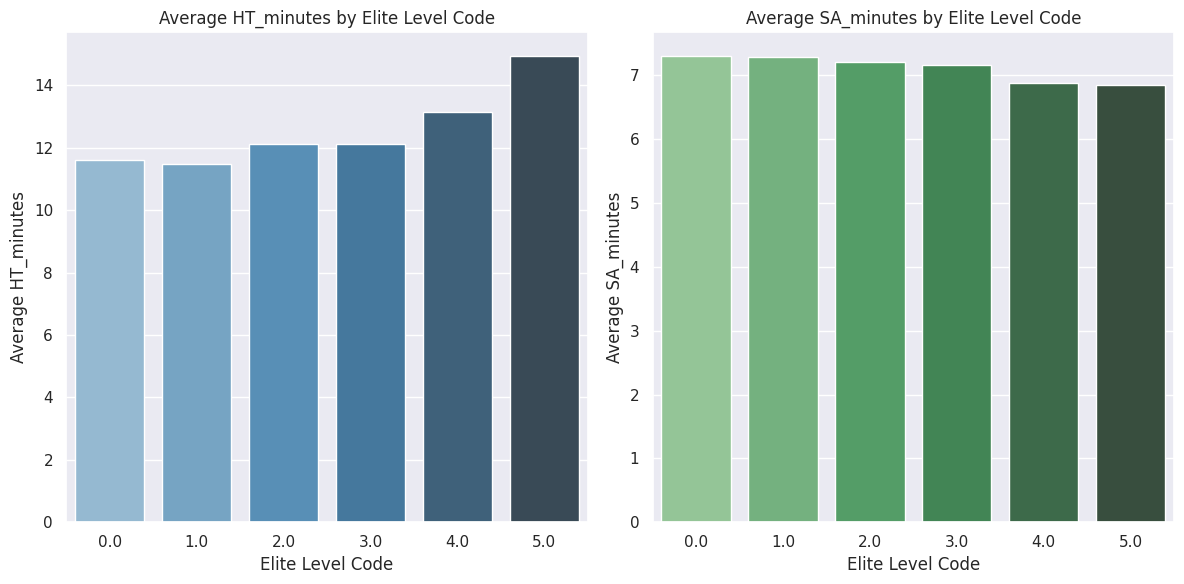

In [61]:
df_customer_handling=pd.merge(df_call,df_customer,on='customer_id',how='inner')

# Group by elite_level_code and calculate the mean of HT_minutes and SA_minutes
df_grouped = df_customer_handling.groupby('elite_level_code').agg({
    'HT_minutes': 'mean',
    'SA_minutes': 'mean'
}).reset_index()

#  Set up the plot figure
plt.figure(figsize=(12, 6))

# Plot Average HT_minutes
plt.subplot(1, 2, 1)  # First subplot
sns.barplot(x='elite_level_code', y='HT_minutes', data=df_grouped, palette='Blues_d')
plt.title('Average HT_minutes by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Average HT_minutes')

#  Plot Average SA_minutes
plt.subplot(1, 2, 2)  # Second subplot
sns.barplot(x='elite_level_code', y='SA_minutes', data=df_grouped, palette='Greens_d')
plt.title('Average SA_minutes by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Average SA_minutes')

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-63-1166d01212c1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='elite_level_code', y='average_sentiment', data=df_grouped, ax=axes[0], palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: 

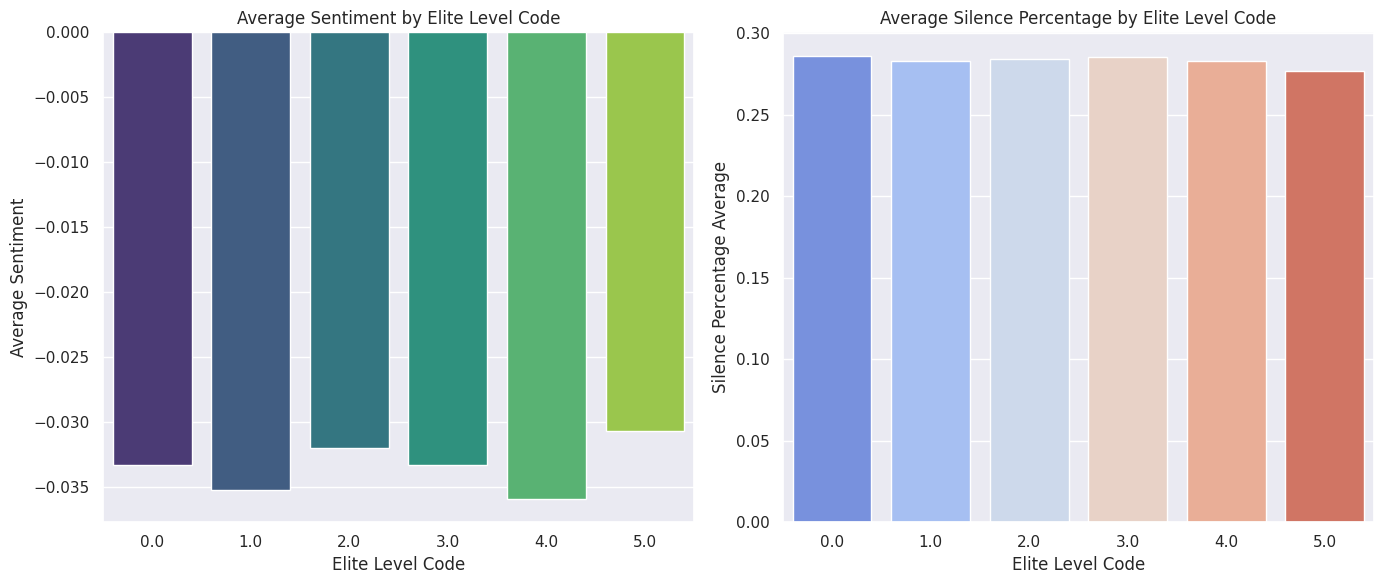

In [63]:
df_senti_customer=pd.merge(df_senti,df_customer_handling,on='call_id',how='inner')

# Group the data by elite_level_code and calculate the mean of average_sentiment and silence_percent_average
df_grouped = df_senti_customer.groupby('elite_level_code').agg({
    'average_sentiment': 'mean',
    'silence_percent_average': 'mean'
}).reset_index()

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for average_sentiment by elite_level_code
sns.barplot(x='elite_level_code', y='average_sentiment', data=df_grouped, ax=axes[0], palette="viridis")
axes[0].set_title('Average Sentiment by Elite Level Code')
axes[0].set_xlabel('Elite Level Code')
axes[0].set_ylabel('Average Sentiment')

# Bar plot for silence_percent_average by elite_level_code
sns.barplot(x='elite_level_code', y='silence_percent_average', data=df_grouped, ax=axes[1], palette="coolwarm")
axes[1].set_title('Average Silence Percentage by Elite Level Code')
axes[1].set_xlabel('Elite Level Code')
axes[1].set_ylabel('Silence Percentage Average')

# Display the plots
plt.tight_layout()
plt.show()
